### Question 5 [10 points]

Reproduce one of the images in Figure 2. If you feel adventurous, you can make more than one!

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

from pathlib import Path

# Small style adjustments for more readable plots
plt.style.use("seaborn-whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["font.size"] = 14

/tmp/ipykernel_429/187724789.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import fsspec

import xarray as xr
xr.set_options(display_style="html")  # display dataset nicely

import warnings
warnings.simplefilter("ignore")  # filter some warning messages

# code features from https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html
crs = ccrs.PlateCarree()  # set projection

In [3]:
ds = xr.open_dataset("~/shared/climate-data/ds_hw.nc")
ds

<xarray.Dataset>
Dimensions:           (time: 6443, lat: 251, lon: 234)
Coordinates:
  * lat               (lat) float32 33.0 33.06 33.12 33.18 ... 47.88 47.94 48.0
  * lon               (lon) float32 -132.0 -131.9 -131.9 ... -118.1 -118.0
  * time              (time) datetime64[ns] 2002-06-01T09:00:00 ... 2020-01-2...
Data variables:
    analysed_sst      (time, lat, lon) float32 ...
    analysis_error    (time, lat, lon) float32 ...
    mask              (time, lat, lon) float32 ...
    sea_ice_fraction  (time, lat, lon) float32 ...
Attributes: (12/47)
    Conventions:                CF-1.7
    Metadata_Conventions:       Unidata Observation Dataset v1.0
    acknowledgment:             Please acknowledge the use of these data with...
    cdm_data_type:              grid
    comment:                    MUR = "Multi-scale Ultra-high Resolution"
    creator_email:              ghrsst@podaac.jpl.nasa.gov
    ...                         ...
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    time_coverage_end:          20200116T210000Z
    time_coverage_start:        20200115T210000Z
    title:                      Daily MUR SST, Final product
    uuid:                       27665bc0-d5fc-11e1-9b23-0800200c9a66
    westernmost_longitude:      -180.0

In [29]:
# find sst mean from 2002 - 2012
# anomoly = sst value on that day - sst mean from 2002 - 2012
# to find max anamoly month - find average anomoly per month per year and find the maximum
## anomoly per month by comparing by month across years (all the january's compared, etc.) 

sst_mean = ds.sel(time=slice('2002-06', '2016-07')).analysed_sst.mean().data.tolist()
sst_mean

287.5491027832031

In [32]:
grouped = ds.groupby(ds.time.dt.year).mean()

In [36]:
grouped.analysed_sst

<xarray.DataArray 'analysed_sst' (year: 19, lat: 251, lon: 234)>
array([[[292.04532, 292.0382 , 292.0235 , ..., 291.06247, 291.0901 ,
         291.1161 ],
        [292.03555, 292.0238 , 292.01147, ..., 291.0779 , 291.0909 ,
         291.11118],
        [292.02625, 292.01453, 292.00272, ..., 291.1171 , 291.12817,
         291.1361 ],
        ...,
        [287.53812, 287.53357, 287.53885, ...,       nan,       nan,
               nan],
        [287.49533, 287.49863, 287.5069 , ...,       nan,       nan,
               nan],
        [287.44754, 287.4514 , 287.46738, ...,       nan,       nan,
               nan]],

       [[291.3719 , 291.3543 , 291.34122, ..., 290.46643, 290.52878,
         290.55838],
        [291.3598 , 291.33627, 291.31818, ..., 290.47488, 290.53348,
         290.5665 ],
        [291.35123, 291.33398, 291.31717, ..., 290.50848, 290.55664,
         290.60175],
...
        [285.6722 , 285.67545, 285.67728, ...,       nan,       nan,
               nan],
        [285.6731 , 285.67465, 285.66754, ...,       nan,       nan,
               nan],
        [285.6552 , 285.66107, 285.65228, ...,       nan,       nan,
               nan]],

       [[289.81195, 289.79218, 289.82147, ..., 289.29813, 289.31638,
         289.34412],
        [289.82886, 289.79953, 289.79767, ..., 289.31323, 289.3368 ,
         289.3776 ],
        [289.86917, 289.86176, 289.84332, ..., 289.306  , 289.3426 ,
         289.37094],
        ...,
        [283.3874 , 283.39578, 283.4018 , ...,       nan,       nan,
               nan],
        [283.32843, 283.34857, 283.38068, ...,       nan,       nan,
               nan],
        [283.25504, 283.28864, 283.32294, ...,       nan,       nan,
               nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 33.0 33.06 33.12 33.18 ... 47.82 47.88 47.94 48.0
  * lon      (lon) float32 -132.0 -131.9 -131.9 -131.8 ... -118.1 -118.1 -118.0
  * year     (year) int64 2002 2003 2004 2005 2006 ... 2016 2017 2018 2019 2020
Attributes:
    comment:        "Final" version using Multi-Resolution Variational Analys...
    long_name:      analysed sea surface temperature
    standard_name:  sea_surface_foundation_temperature
    units:          kelvin
    valid_max:      32767
    valid_min:      -32767

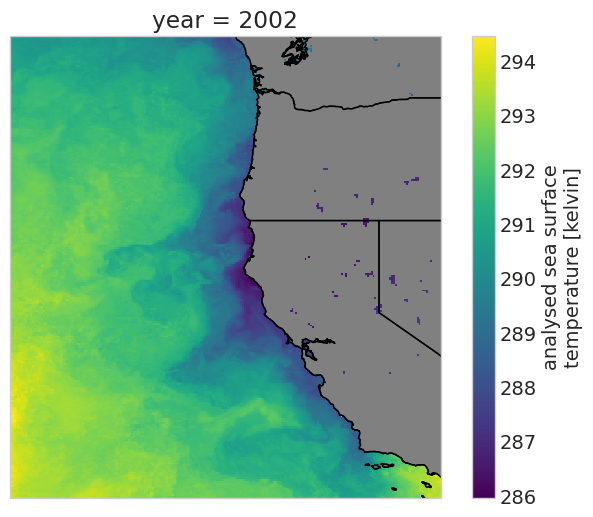

In [9]:
groupby_year = ds.groupby(ds.time.dt.year).max()
groupby_year.analysed_sst.plot()

# Plot on a map
ax = plt.subplot(projection=crs)
groupby_year.analysed_sst[0, :, :].plot(ax=ax, transform=crs)
ax.coastlines("10m", color="k")
ax.add_feature(cfeature.LAND, color="grey")
ax.add_feature(cfeature.STATES.with_scale("10m"))